In [1]:
import time
import requests
import PIL
from PIL import Image
import json
from multiprocessing.pool import ThreadPool
from io import BytesIO
import torchvision.transforms.functional as TF
import torchvision.transforms as transforms
import pickle
import numpy as np
import os
import shutil
from tqdm import tqdm
from multiprocessing import Process, Queue
import queue
import pycocotools
from detectron2.structures import BoxMode
from pycocotools.coco import COCO
import matplotlib.pyplot as plt
import glob

import model_predict_func

loading annotations into memory...
Done (t=0.02s)
creating index...
index created!


AttributeError: 'AxesImage' object has no attribute 'canvas'

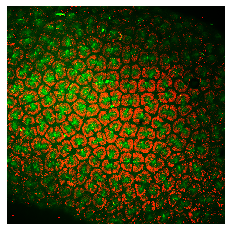

In [2]:
fig = plt.figure()

img_dir = 'datasets/kidney_actual/images/'
json_path = 'datasets/kidney_actual/annotations/instances_default.json'
out_dir = 'datasets/outputs'
image_id = 3
coco = COCO(json_path)

img = coco.imgs[image_id]

image = np.array(Image.open(os.path.join(img_dir, img['file_name'])))
fig = plt.imshow(image, interpolation='nearest'); plt.axis('off')
# plt.savefig('datasets/outputs/0.png')
f0 = np.fromstring(fig.canvas.tostring_rgb(), dtype=np.uint8, sep='')
f0 = data.reshape(fig.canvas.get_width_height()[::-1] + (3,))
plt.show()

catIds = coco.getCatIds(catNms=['tip'])
imgIds = coco.getImgIds(catIds=catIds)

plt.imshow(image); plt.axis('off')
annIds = coco.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
anns = coco.loadAnns(annIds)
coco.showAnns(anns)
plt.savefig('datasets/outputs/1.png')
plt.show()

if os.path.isfile('{}/{}_visual.JPG'.format(out_dir,os.path.splitext(img['file_name'])[0])):
    visual = np.array(Image.open('{}/{}_visual.JPG'.format(out_dir,os.path.splitext(img['file_name'])[0])))
    plt.imshow(visual); plt.axis('off')
    plt.savefig('datasets/outputs/2.png')
    plt.show()
                
if os.path.isfile('datasets/outputs/2.png'):
    im0 = np.array(Image.open('datasets/outputs/0.png'))
    im1 = np.array(Image.open('datasets/outputs/1.png'))
    im2 = np.array(Image.open('datasets/outputs/2.png'))
    imgs = np.concatenate((im0,im1,im2),axis = 1)
    plt.imshow(imgs); plt.axis('off')
    


In [3]:
impath = ''
for impath in tqdm(glob.glob("datasets/Kidney_MAX_1116/*.png"), desc = impath, position=0, leave=True):
    model_predict_func.main(impath, 'datasets/outputs/testing', rerun = True)

  0%|                                                                                                                          | 0/15 [00:00<?, ?it/s]

run model
run polygon non-max-suppression
output verification saved to datasets/outputs/testing/MAX e17-5 10x stack 5um slices Six2_ecad_PNA_PDGFRa kidney 2-005-1.tif (RGB)_visual.JPG


  7%|███████▌                                                                                                         | 1/15 [03:27<48:31, 207.95s/it]

run model
run polygon non-max-suppression
output verification saved to datasets/outputs/testing/MAX e17-5 10x stack 5um slices Six2_ecad_PNA_PDGFRa kidney 4-015-1.tif (RGB)_visual.JPG


 13%|███████████████                                                                                                  | 2/15 [08:56<52:52, 244.02s/it]

run model
run polygon non-max-suppression
output verification saved to datasets/outputs/testing/MAX e18-5 10x stack 5um slices Six2_calbindin_PNA_PDGFRa kidney 3 2x2-007.tif (RGB)_visual.JPG


 20%|██████████████████████▌                                                                                          | 3/15 [12:29<46:59, 234.93s/it]

run model
run polygon non-max-suppression
output verification saved to datasets/outputs/testing/MAX e17-5 10x stack 5um slices Six2_calbindin_PNA_PDGFRa kidney 1 2x2-008-1.tif (RGB)_visual.JPG


 27%|██████████████████████████████▏                                                                                  | 4/15 [16:56<44:50, 244.56s/it]

run model
run polygon non-max-suppression
output verification saved to datasets/outputs/testing/MAX e17-5 10x stack 5um slices Six2_ecad_PNA_PDGFRa kidney 3-013-1.tif (RGB)_visual.JPG


 33%|█████████████████████████████████████▋                                                                           | 5/15 [23:49<49:10, 295.02s/it]

run model
run polygon non-max-suppression
output verification saved to datasets/outputs/testing/MAX e17-5 10x stack 5um slices Six2_calbindin_PNA_PDGFRa kidney 2 2x2-012-1.tif (RGB)_visual.JPG


 40%|█████████████████████████████████████████████▏                                                                   | 6/15 [28:56<44:47, 298.60s/it]

run model
run polygon non-max-suppression
output verification saved to datasets/outputs/testing/MAX e18-5 10x stack 5um slices Six2_ecad_PNA_PDGFRa kidney 1-003.tif (RGB)_visual.JPG


 47%|████████████████████████████████████████████████████▋                                                            | 7/15 [37:43<48:56, 367.03s/it]

run model
run polygon non-max-suppression
output verification saved to datasets/outputs/testing/MAX e17-5 10x stack 5um slices Six2_calbindin_PNA_PDGFRa kidney 3 2x2-006-1.tif (RGB)_visual.JPG


 53%|████████████████████████████████████████████████████████████▎                                                    | 8/15 [41:29<37:53, 324.83s/it]

run model
run polygon non-max-suppression
output verification saved to datasets/outputs/testing/MAX e17-5 10x stack 5um slices Six2_ecad_PNA_PDGFRa kidney 1-2-005-1.tif (RGB)_visual.JPG


 60%|███████████████████████████████████████████████████████████████████▊                                             | 9/15 [44:59<29:02, 290.37s/it]

run model
run polygon non-max-suppression
output verification saved to datasets/outputs/testing/MAX e16-5 10x stack 5um slices Six2_ecad_PNA_PDGFRa kidney 3-004-1.tif (RGB)_visual.JPG


 67%|██████████████████████████████████████████████████████████████████████████▋                                     | 10/15 [47:59<21:25, 257.10s/it]

run model
run polygon non-max-suppression
output verification saved to datasets/outputs/testing/MAX e18-5 10x stack 5um slices Six2_calbindin_PNA_PDGFRa kidney 1 2x2-009.tif (RGB)_visual.JPG


 73%|██████████████████████████████████████████████████████████████████████████████████▏                             | 11/15 [54:20<19:38, 294.51s/it]

run model
run polygon non-max-suppression
output verification saved to datasets/outputs/testing/MAX e18-5 10x stack 5um slices Six2_calbindin_PNA_PDGFRa kidney 2 2x2-011.tif (RGB)_visual.JPG


 80%|█████████████████████████████████████████████████████████████████████████████████████████▌                      | 12/15 [59:19<14:47, 295.74s/it]

run model
run polygon non-max-suppression
output verification saved to datasets/outputs/testing/MAX e16-5 10x stack 5um slices Six2_ecad_PNA_PDGFRa kidney 2-004.tif (RGB)_visual.JPG


 87%|███████████████████████████████████████████████████████████████████████████████████████████████▎              | 13/15 [1:02:03<08:32, 256.10s/it]

run model
run polygon non-max-suppression
output verification saved to datasets/outputs/testing/MAX e18-5 10x stack 5um slices Six2_ecad_PNA_PDGFRa kidney 2-010.tif (RGB)_visual.JPG


 93%|██████████████████████████████████████████████████████████████████████████████████████████████████████▋       | 14/15 [1:09:46<05:18, 318.35s/it]

run model
run polygon non-max-suppression
output verification saved to datasets/outputs/testing/MAX e16-5 10x stack 5um slices Six2_ecad_PNA_PDGFRa kidney 1-016-1_visual.JPG


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 15/15 [1:14:32<00:00, 298.18s/it]
